<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/Copy_of_Bayesian_BNLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U bnlearn 

     |████████████████████████████████| 1.9 MB 8.2 MB/s 
     |████████████████████████████████| 10.3 MB 22.4 MB/s 
     |████████████████████████████████| 119 kB 66.2 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=8baf74b6978cc7743d9184a9b2e542f03f6f2b7f2ec05202908ddef643beb5ca
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
 # Import bnlearn
import bnlearn as bn
import pandas as pd # for data manipulation 

In [ ]:
    # Load example DataFrame
from google.colab import files
uploaded = files.upload()

Saving engineering_1.csv to engineering_1.csv


In [ ]:
df=pd.read_csv('engineering_1.csv')
df.head(10)

,party,smart,innovative,assignment,laptop,project,goal,happy
0,0,1,1,1,1,0,0,0
1,1,1,0,1,1,1,1,1
2,0,1,1,1,1,1,1,0
3,0,1,1,1,0,1,1,1
4,1,1,0,0,1,1,1,1
5,0,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1
8,1,0,1,0,0,1,0,0
9,1,1,1,0,1,1,0,1


[bnlearn] >Plot based on BayesianModel


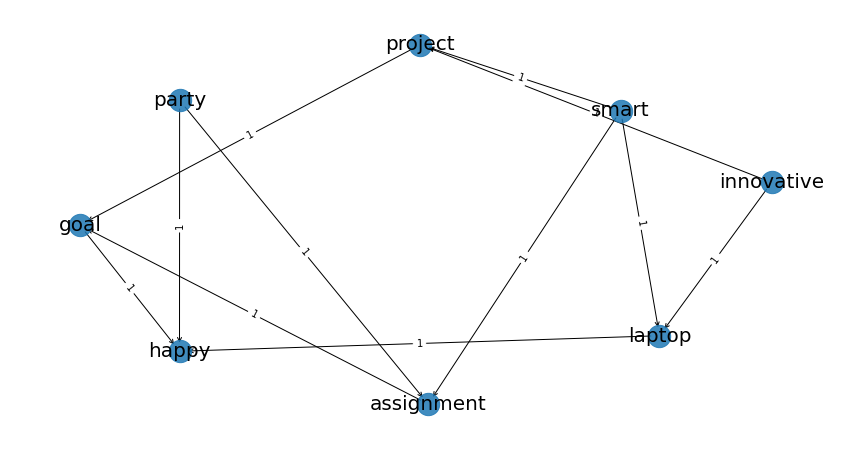

{'G': <networkx.classes.digraph.DiGraph at 0x7f6d13d55490>,
 'pos': {'assignment': array([ 0.03039762, -0.99248057]),
  'goal': array([-0.95319447, -0.03124001]),
  'happy': array([-0.67174867, -0.70885953]),
  'innovative': array([1.        , 0.19765664]),
  'laptop': array([ 0.68355619, -0.62550938]),
  'party': array([-0.67145461,  0.63887872]),
  'project': array([0.00850473, 0.93789982]),
  'smart': array([0.57393922, 0.58365432])}}

In [ ]:
# Create some edges for the DAG
edges = [('party', 'happy'),
             ('goal', 'happy'),('laptop','happy'),('assignment','goal'),('project','goal'),('party','assignment'),('smart','assignment'),('smart','project'),('smart','laptop'),('innovative','project'),('innovative','laptop')
             ]

# Construct the Bayesian DAG
DAG = bn.make_DAG(edges, verbose=0)
# Plot DAG
bn.plot(DAG)

In [ ]:
   # Learn CPDs using the DAG and dataframe
model = bn.parameter_learning.fit(DAG, df, verbose=3)
bn.print_CPD(model)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of party:
+----------+----------+
| party(0) | 0.414833 |
+----------+----------+
| party(1) | 0.585167 |
+----------+----------+
[bnlearn] >CPD of happy:
+----------+--------------------+---------------------+-----------+--------------------+--------------------+---------------------+---------------------+--------------------+
| goal     | goal(0)            | goal(0)             | goal(0)   | goal(0)            | goal(1)            | goal(1)             | goal(1)             | goal(1)            |
+----------+--------------------+---------------------+-----------+--------------------+--------------------+---------------------+---------------------+--------------------+
| laptop   | laptop(0)          | laptop(0)           | laptop(1) | laptop(1)          | laptop(0)          | laptop(0)           | laptop(1)           | laptop(1)          |
+----------+--------------------+---------------------+---------

In [ ]:
Xtest = bn.sampling(model, n=1000)
print(Xtest)

[bnlearn] >Forward sampling for 1000 samples..


Generating for node: happy: 100%|██████████| 8/8 [00:00<00:00, 96.78it/s]

     party  happy  goal  laptop  assignment  project  smart  innovative
0        0      0     1       1           1        1      1           0
1        1      1     1       1           0        0      0           0
2        1      1     1       1           1        0      0           1
3        1      1     0       1           0        0      0           0
4        1      1     0       0           1        0      0           0
..     ...    ...   ...     ...         ...      ...    ...         ...
995      1      1     1       1           1        1      1           1
996      0      0     1       0           1        1      1           1
997      0      0     1       1           1        1      1           1
998      1      0     0       1           0        1      1           1
999      1      1     0       0           0        1      1           1

[1000 rows x 8 columns]


In [ ]:
Pout = bn.predict(model, Xtest, variables=['happy'])
print(Pout)

[bnlearn]> Remaining columns for inference: 7


100%|██████████| 107/107 [00:03<00:00, 30.77it/s]

     happy         p
0        0  0.621882
1        1  0.906452
2        1  0.906452
3        0  0.506750
4        0  0.564082
..     ...       ...
995      1  0.906452
996      0  0.650442
997      0  0.621882
998      0  0.506750
999      0  0.564082

[1000 rows x 2 columns]
